<a href="https://colab.research.google.com/github/bedhinesh/capstone-aiml/blob/dhinesh/Capstone_project_Dhinesh_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement 
## Domain : Automotive, Surveillance. 
#### **Context** : Computer vision can be used to automate supervision and generate action . Appropriate action trigger is possible if the event is predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of the car, type, colour, number plates etc
## **PROJECT OBJECTIVE**: Design a Deep Learning based car identification model. By given image of a car we should be able to predict which make , model of the car

# DATA DESCRIPTION:
The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.

1.   Train Images: Consists of real images of cars as per the make and year of the car.
2.   Test Images: Consists of real images of cars as per the make and year of the car.
3.   Train Annotation: Consists of bounding box region for training images.
4.   Test Annotation: Consists of bounding box region for testing images



In [2]:
#Import Libraries
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Initialize the random number generator
import random
random.seed(0)

#Tensor Flow
import tensorflow
tensorflow.__version__

#Matplot
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
%matplotlib inline

#Importing drive
from google.colab import drive
#OS
import os
#Numpy
import numpy as np
#Pandas
import pandas as pd

#CV2
import cv2

In [3]:
#Mount Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"
project_path = '/content/drive/My Drive/kaggle/'
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [5]:
#Download data from kaggle
!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder
!ls
#unzipping the zip files and deleting the zip files
!unzip \*.zip

stanford-car-dataset-by-classes-folder.zip: Skipping, found more recently modified local copy (use --force to force download)
anno_test.csv	car_data     names.csv
anno_train.csv	kaggle.json  stanford-car-dataset-by-classes-folder.zip
Archive:  stanford-car-dataset-by-classes-folder.zip
replace anno_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace anno_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace car_data/car_data/test/AM General Hummer SUV 2000/00076.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace car_data/car_data/test/AM General Hummer SUV 2000/00457.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: None
None
N
N
y
n








In [8]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

def load_image(path):
    img = cv2.imread(path, 1)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img[...,::-1]

In [9]:
# metadata = load_metadata('images')
trainMetaData = load_metadata('car_data/car_data/train/')
trainMetaData.shape


(8144,)

In [10]:
testMetaData = load_metadata('car_data/car_data/test/')
testMetaData.shape

(8041,)

In [11]:
print(trainMetaData[0])
print(testMetaData[0])

car_data/car_data/train/AM General Hummer SUV 2000/07279.jpg
car_data/car_data/test/AM General Hummer SUV 2000/00076.jpg


In [12]:
annotation_train_csv = pd.read_csv('anno_train.csv', header = None)

annotation_test_csv = pd.read_csv('anno_test.csv', header = None)
data_labels = np.array(pd.read_csv('names.csv',header = None))

In [13]:
print(annotation_train_csv.info)
print(annotation_test_csv.info)
print(data_labels.shape)
annotation_train_csv

<bound method DataFrame.info of               0    1    2     3     4    5
0     00001.jpg   39  116   569   375   14
1     00002.jpg   36  116   868   587    3
2     00003.jpg   85  109   601   381   91
3     00004.jpg  621  393  1484  1096  134
4     00005.jpg   14   36   133    99  106
...         ...  ...  ...   ...   ...  ...
8139  08140.jpg    3   44   423   336   78
8140  08141.jpg  138  150   706   523  196
8141  08142.jpg   26  246   660   449  163
8142  08143.jpg   78  526  1489   908  112
8143  08144.jpg   20  240   862   677   17

[8144 rows x 6 columns]>
<bound method DataFrame.info of               0    1    2     3    4    5
0     00001.jpg   30   52   246  147  181
1     00002.jpg  100   19   576  203  103
2     00003.jpg   51  105   968  659  145
3     00004.jpg   67   84   581  407  187
4     00005.jpg  140  151   593  339  185
...         ...  ...  ...   ...  ...  ...
8036  08037.jpg   49   57  1169  669   63
8037  08038.jpg   23   18   640  459   16
8038  08039.jpg 

,0,1,2,3,4,5
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106
...,...,...,...,...,...,...
8139,08140.jpg,3,44,423,336,78
8140,08141.jpg,138,150,706,523,196
8141,08142.jpg,26,246,660,449,163
8142,08143.jpg,78,526,1489,908,112


## From the data imported we can see that 8144 Train images and 8041 Test images are available in Data Folder . Also we have the 196 classes which is specified in data_labels

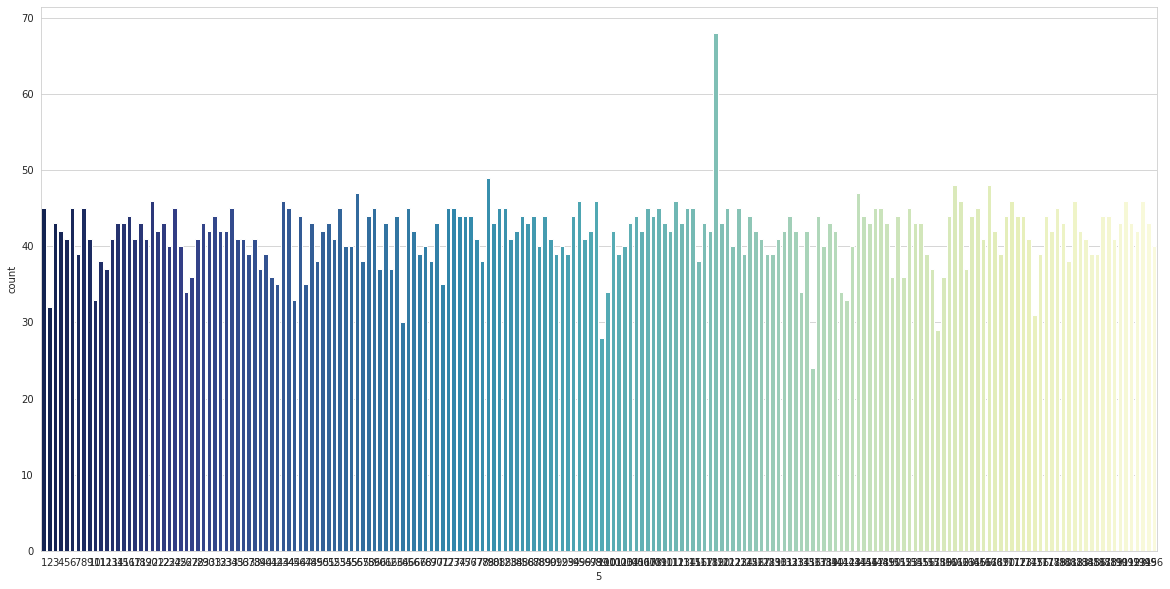

In [14]:
sns.set_style('whitegrid')
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax,x=5,data=annotation_train_csv, palette='YlGnBu_r')
plt.show()

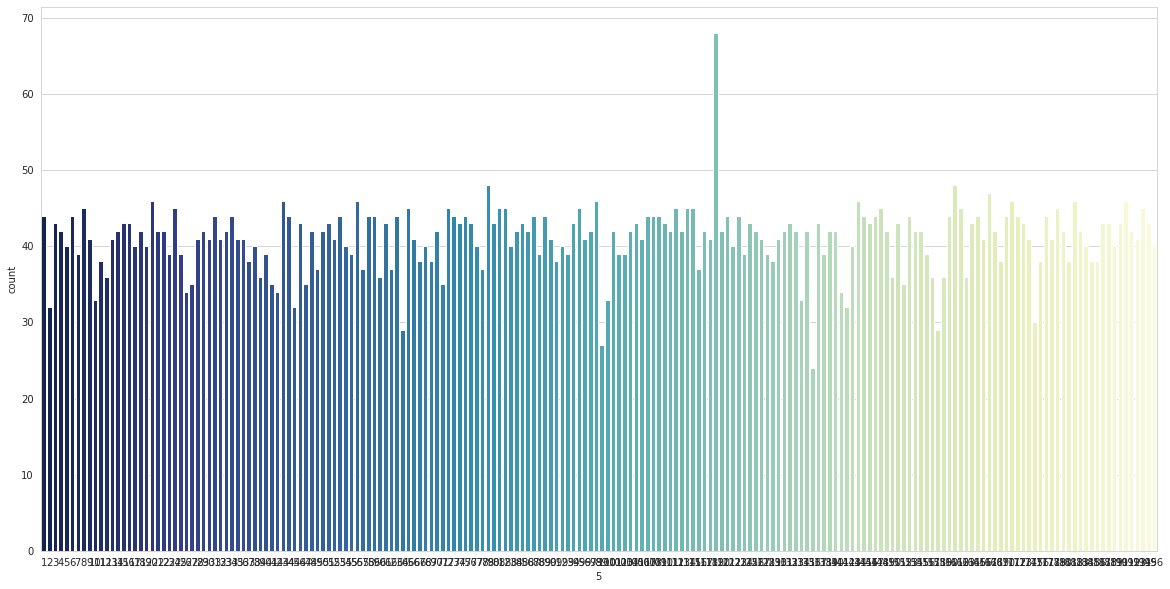

In [15]:
sns.set_style('whitegrid')
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax,x=5,data=annotation_test_csv, palette='YlGnBu_r')
plt.show()

## Both Train and Test data classes are almost distributed with the same number of samples for each class of vehicle . Though the range of samples for each vehicle range is form 25-75 images .

Size of original input:  (179, 300, 3)
0    00002.jpg
1           36
2          116
3          868
4          587
5            3
Name: 1, dtype: object
<class 'pandas.core.series.Series'>


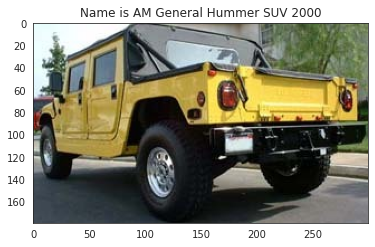

Size of original input:  (96, 96, 3)
0    00011.jpg
1           51
2           93
3          601
4          393
5           49
Name: 10, dtype: object
<class 'pandas.core.series.Series'>


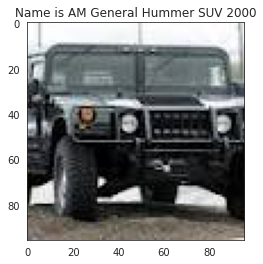

Size of original input:  (334, 500, 3)
0    00026.jpg
1           30
2          174
3          598
4          379
5          134
Name: 25, dtype: object
<class 'pandas.core.series.Series'>


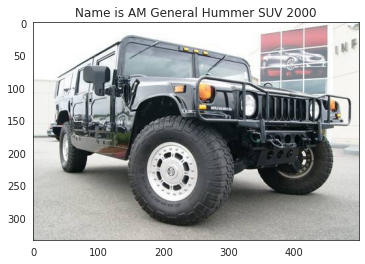

Size of original input:  (326, 500, 3)
0    00081.jpg
1           10
2           55
3          540
4          271
5            8
Name: 80, dtype: object
<class 'pandas.core.series.Series'>


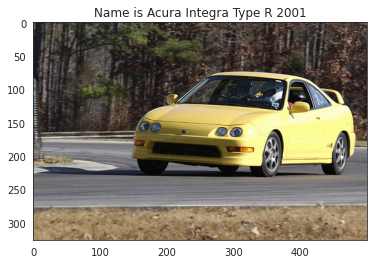

Size of original input:  (600, 800, 3)
0    00101.jpg
1           70
2           39
3          940
4          742
5          193
Name: 100, dtype: object
<class 'pandas.core.series.Series'>


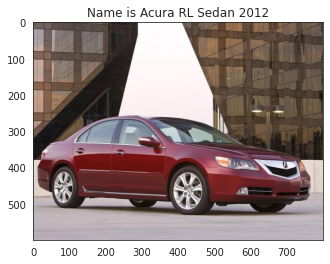

Size of original input:  (389, 632, 3)
0    00131.jpg
1          275
2          195
3          863
4          474
5          171
Name: 130, dtype: object
<class 'pandas.core.series.Series'>


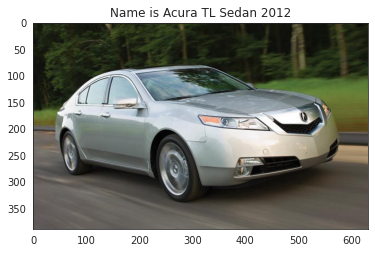

Size of original input:  (66, 89, 3)
0    00501.jpg
1            4
2           30
3          146
4           86
5          161
Name: 500, dtype: object
<class 'pandas.core.series.Series'>


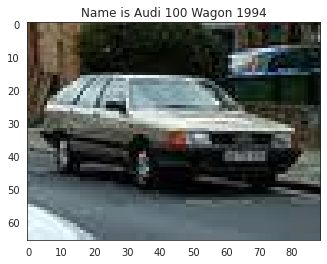

Size of original input:  (225, 300, 3)
0    01001.jpg
1           36
2           13
3          611
4          302
5           43
Name: 1000, dtype: object
<class 'pandas.core.series.Series'>


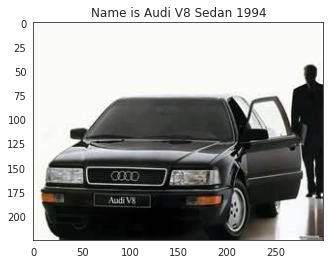

Size of original input:  (225, 300, 3)
0    05001.jpg
1            1
2           27
3          640
4          438
5          179
Name: 5000, dtype: object
<class 'pandas.core.series.Series'>


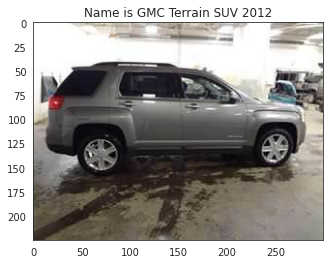

Size of original input:  (480, 640, 3)
0    08001.jpg
1           24
2           18
3          627
4          434
5          149
Name: 8000, dtype: object
<class 'pandas.core.series.Series'>


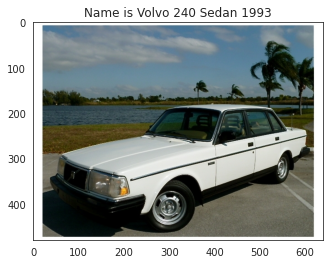

In [16]:
sns.set_style('white')
loadImage = [1,10,25,80,100,130,500,1000,5000,8000]
def load_image_boundary(metaData,annotation):
    sns.set_style('white')
    loadImage = [1,10,25,80,100,130,500,1000,5000,8000]
    for i in loadImage:
      image = load_image(metaData[i].image_path())
      print ("Size of original input: ", image.shape)
      plt.title(f'Name is {metaData[i].name}');
      plt.imshow(image)
      k = 0
      imagepoints = annotation.iloc[i]
      print(imagepoints)
      print(type(imagepoints))
      x0 = int(imagepoints[1])
      x1 = int(imagepoints[3])
      y0 = int(imagepoints[2])
      y1 = int(imagepoints[4])
      rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')
      ax.add_patch(rect)   
      plt.show()

load_image_boundary(trainMetaData,annotation_train_csv)


## Size of the Images are different